# Regularization

is a techique to structure the parameters in a form you prefer, often to solve **overfitting** problem.

為了影響演算法產生一組係數很小的向量 w, 我們加入一個常數、非負的惩罰項 λ.

$Cost(X, Y) = Loss(X, Y) + λ|w|$

如此一來，回歸演算法求取最小 cost 時，會因為 λ（大）而求得一組(小)向量 w.

* 一般常用 L1, L2 norm

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(100)

learning_rate = 0.001
training_epochs = 1000
reg_lambda = 0.

/usr/local/miniconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
# 首先必須先將資料分成兩份： train, test

def split_dataset(x, y, ratio):
    lst_idx = np.arange(x.size)    # np.arange(5) => array([0, 1, 2, 3, 4])
    np.random.shuffle(lst_idx)    # give us a shuffled list: array([2, 0, 3, 4, 1])
    num_train = int(ratio * x.size)
    
    x_train = x[lst_idx[0:num_train]]
    x_test = x[lst_idx[num_train:x.size]]
    
    y_train = y[lst_idx[0:num_train]]
    y_test = y[lst_idx[num_train:x.size]]
    return x_train, x_test, y_train, y_test


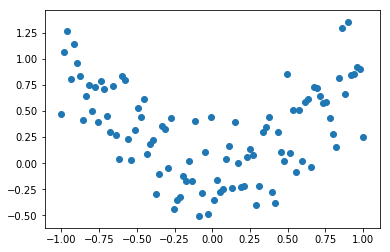

In [4]:
x_data = np.linspace(-1, 1, 100)

num_coeffs = 9
y_data_params = [0.] * num_coeffs
y_data_params[2] = 1
y_data = 0

for i in range(num_coeffs):
        y_data += y_data_params[i] * np.power(x_data, i)

y_data += np.random.randn(*x_data.shape) * 0.3    # y = x^2

plt.scatter(x_data, y_data)

In [5]:
(x_train, x_test, y_train, y_test) = split_dataset(x_data, y_data, 0.7)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((70,), (30,), (70,), (30,))

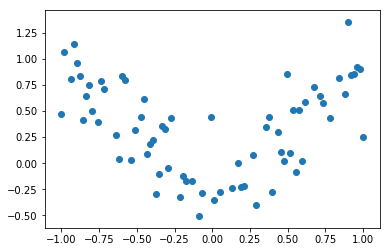

In [6]:
plt.scatter(x_train, y_train)

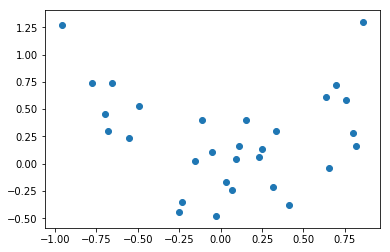

In [7]:
plt.scatter(x_test, y_test)

In [8]:
X = tf.placeholder("float")
Y = tf.placeholder("float")

def model(X, w):
    terms = []
    for i in range(num_coeffs):
        term = tf.multiply(w[i], tf.pow(X, i))
        terms.append(term)
    return tf.add_n(terms)

In [9]:
w = tf.Variable([0.] * num_coeffs, name="parameters")
y_model = model(X, w)
cost = tf.div(tf.add(tf.reduce_sum(tf.square(Y-y_model)),
                     tf.multiply(reg_lambda, tf.reduce_sum(tf.square(w)))),
              2*x_train.size)

In [10]:
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [11]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

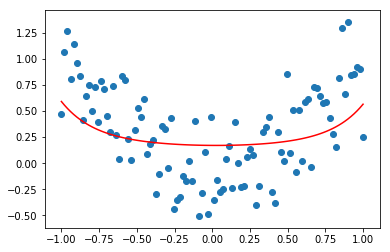

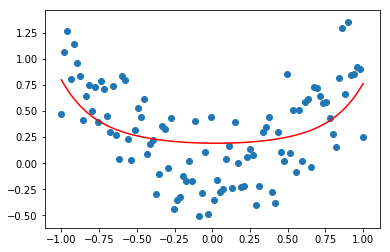

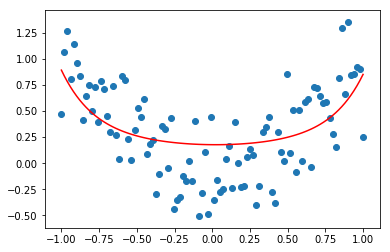

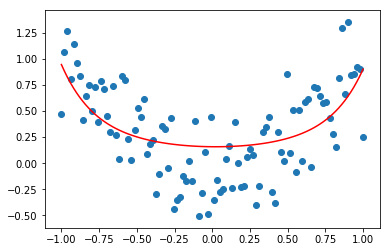

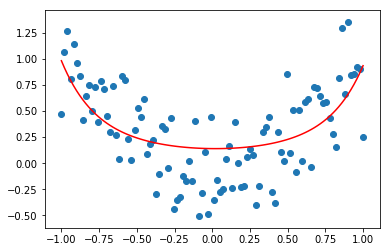

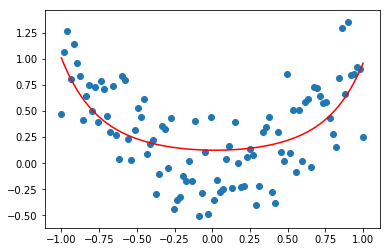

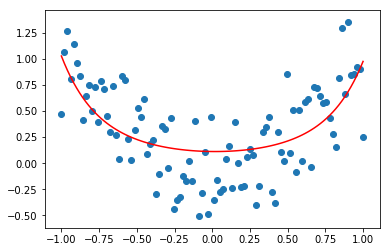

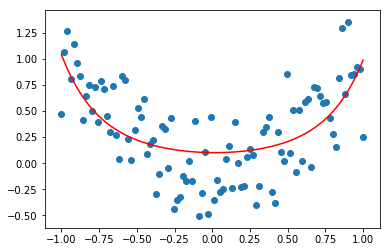

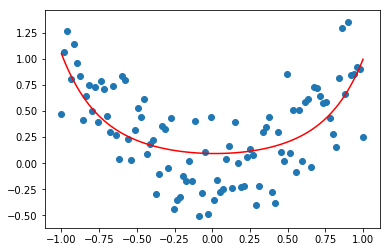

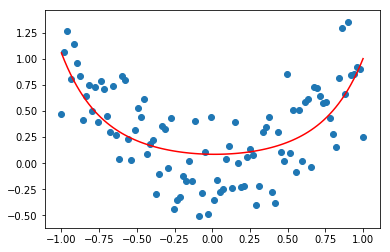

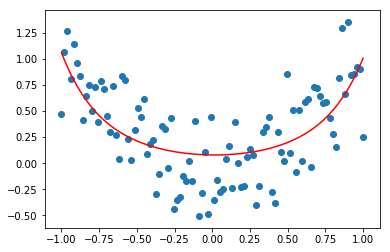

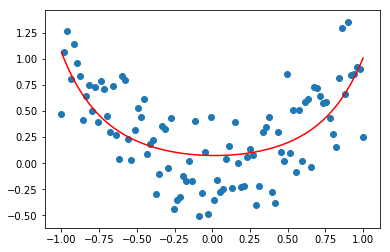

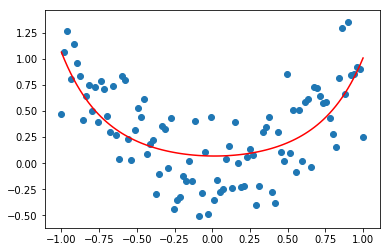

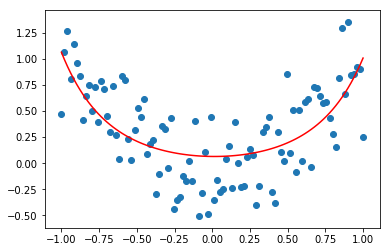

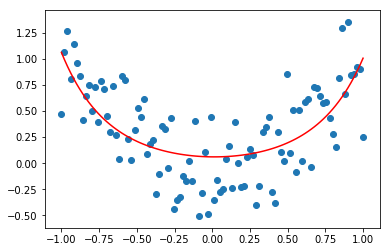

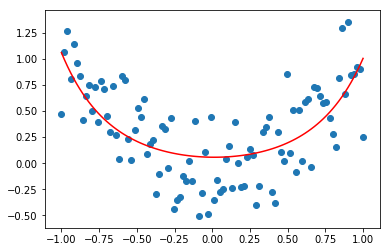

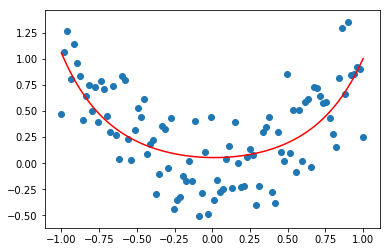

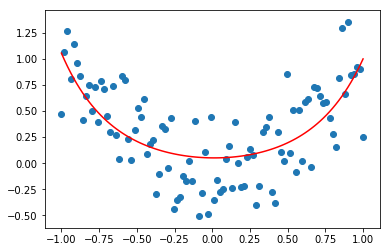

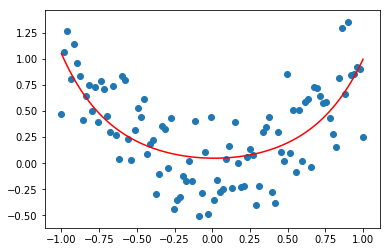

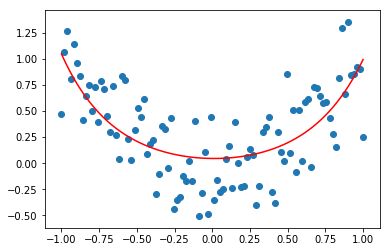

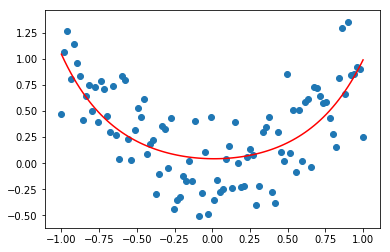

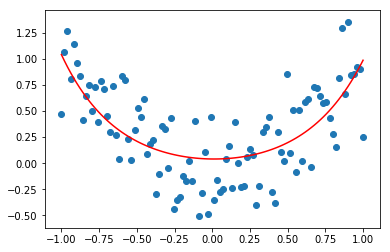

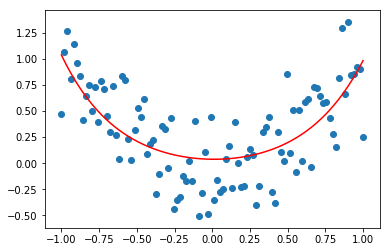

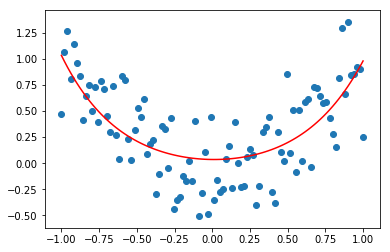

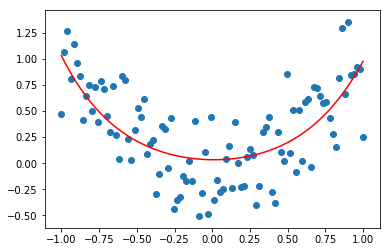

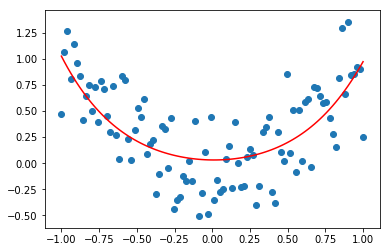

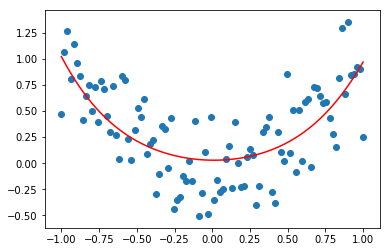

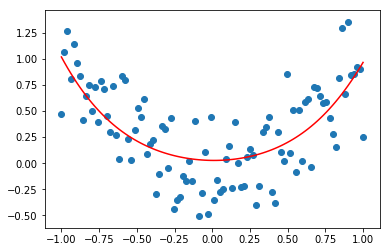

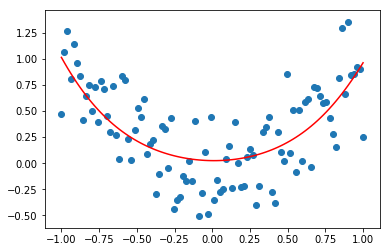

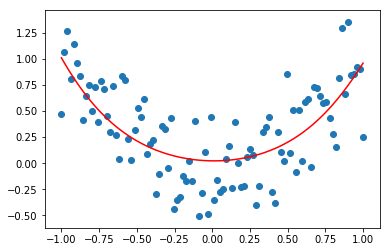

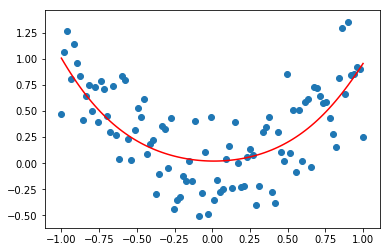

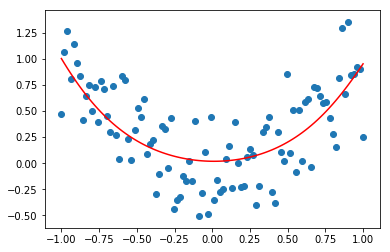

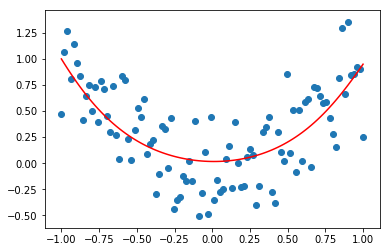

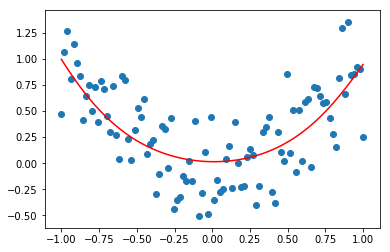

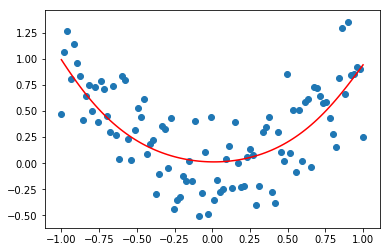

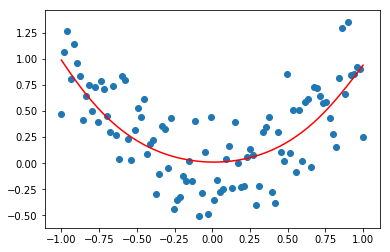

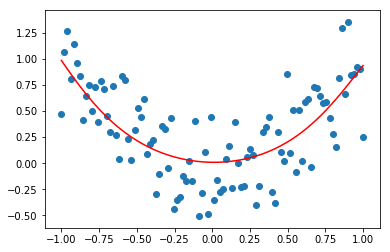

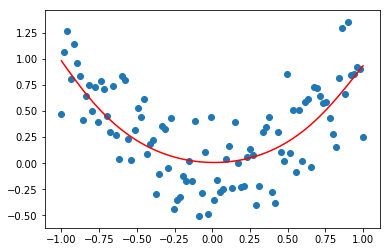

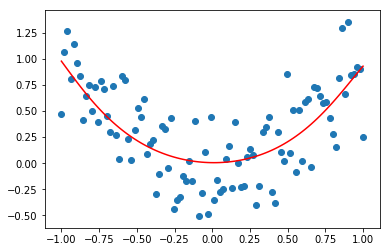

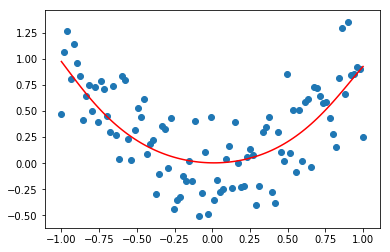

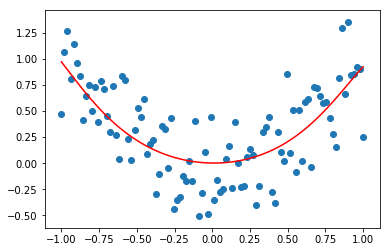

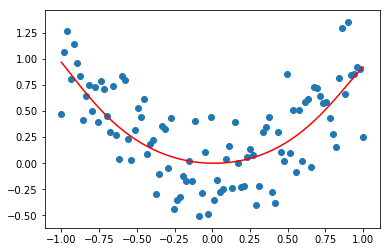

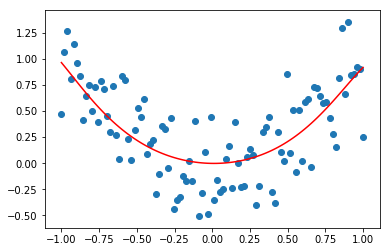

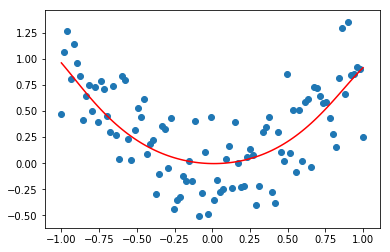

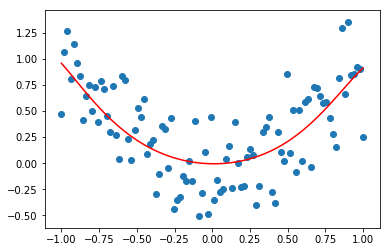

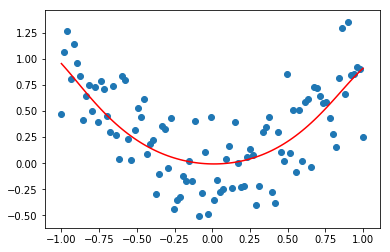

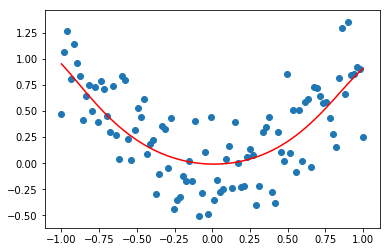

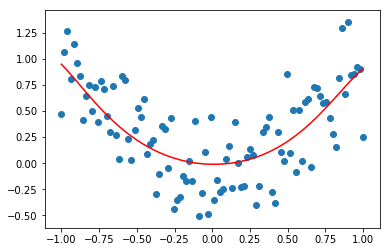

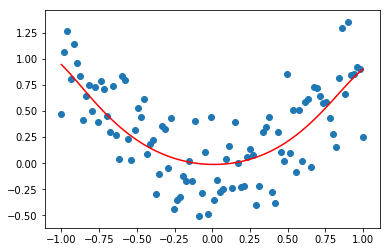

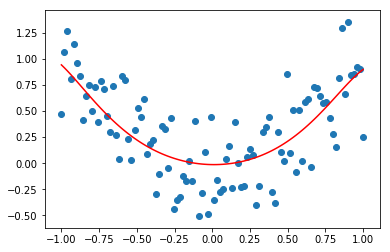

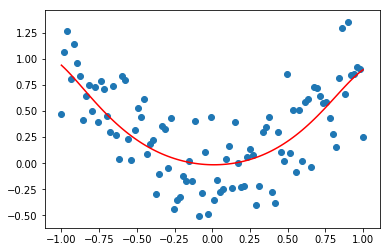

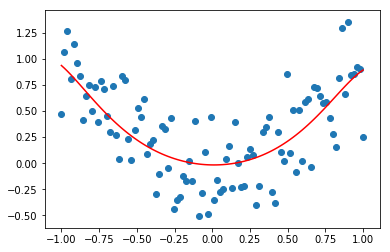

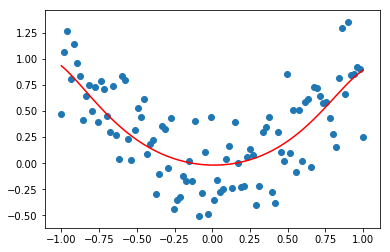

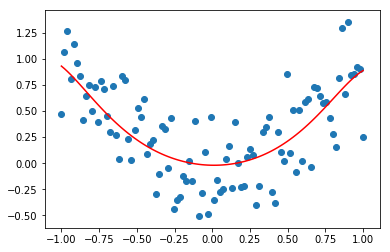

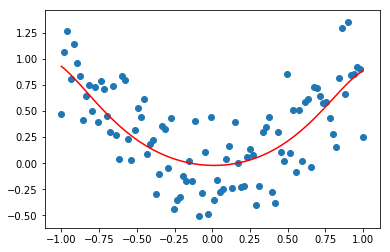

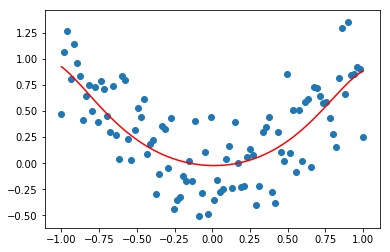

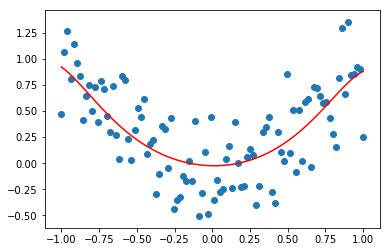

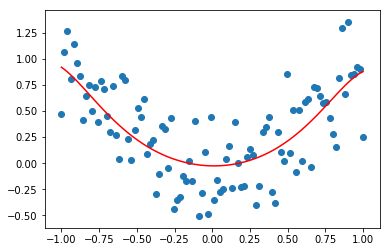

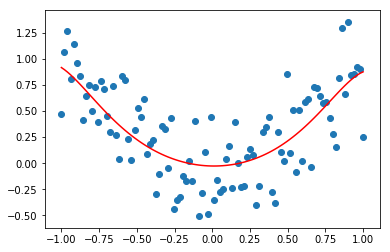

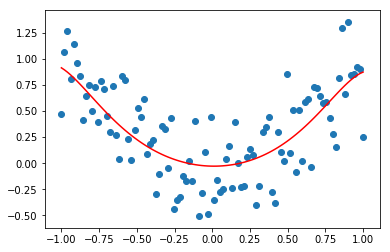

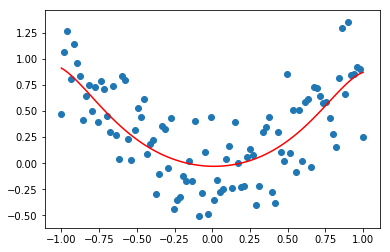

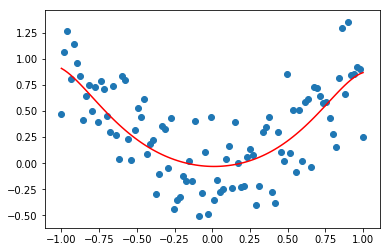

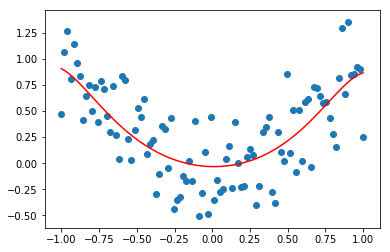

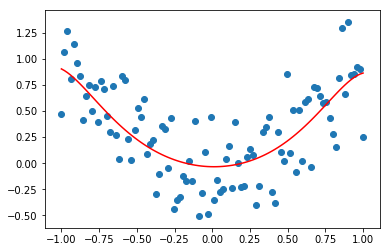

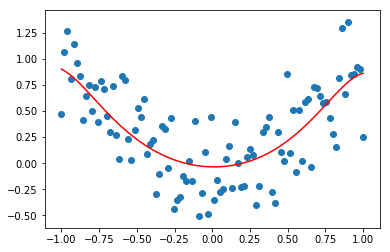

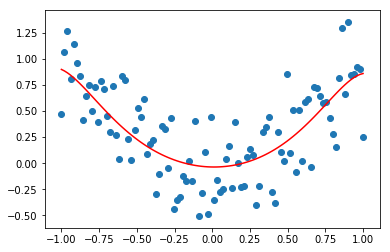

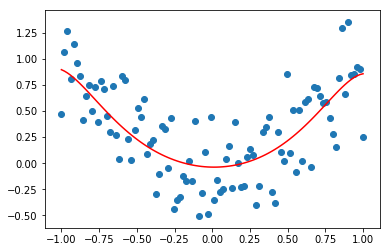

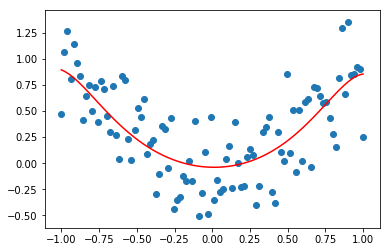

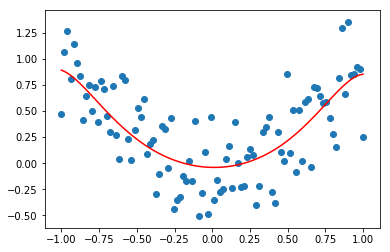

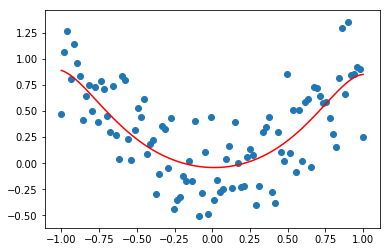

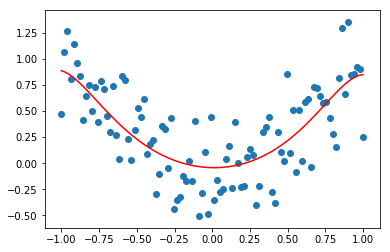

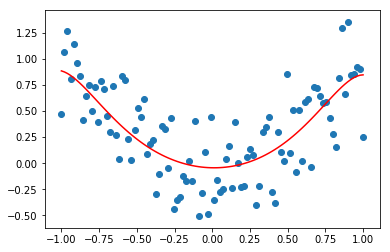

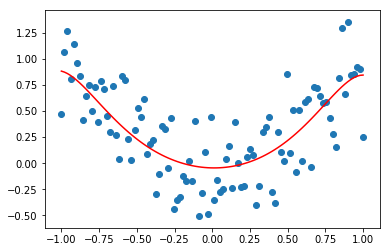

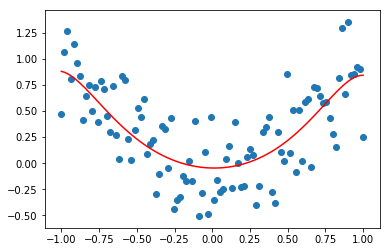

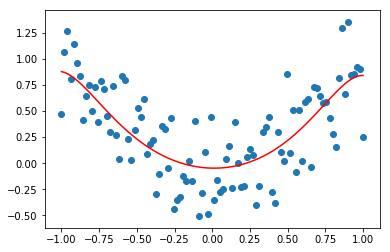

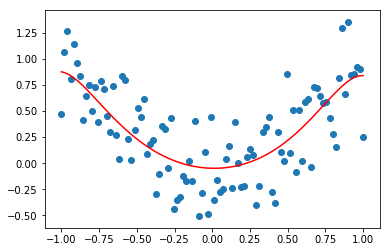

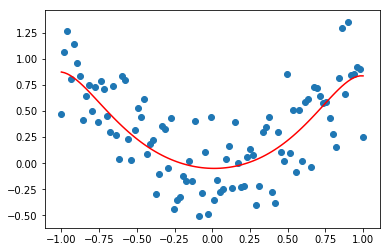

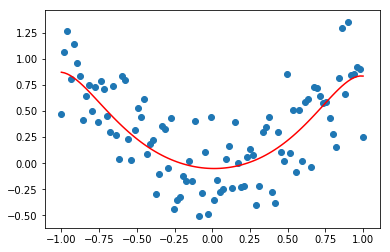

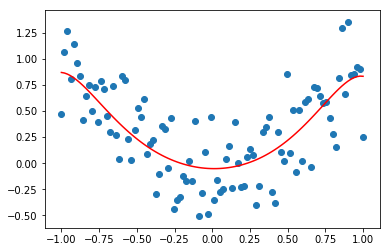

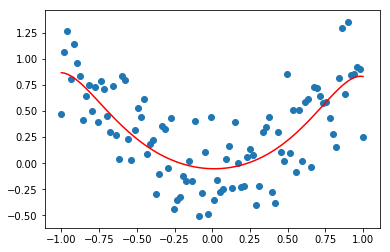

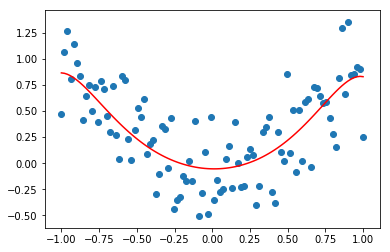

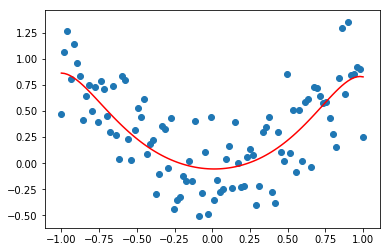

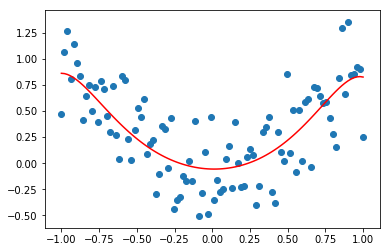

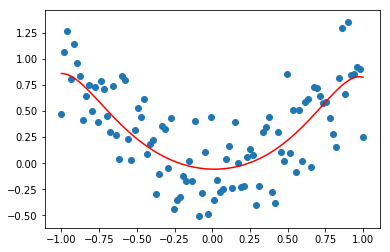

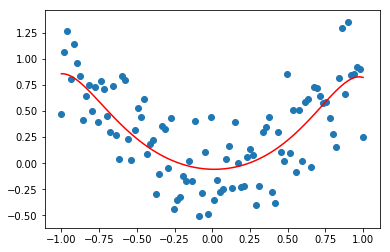

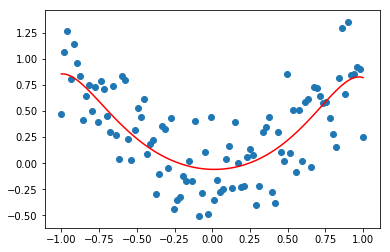

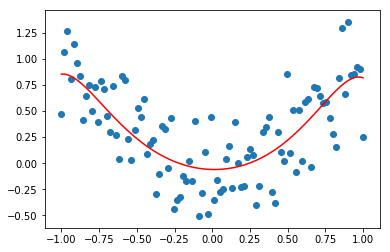

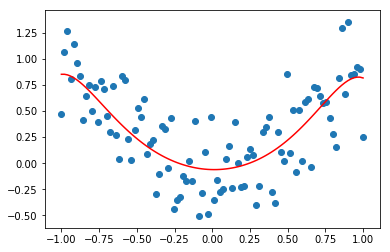

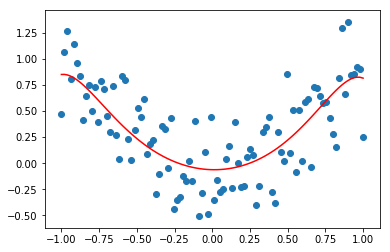

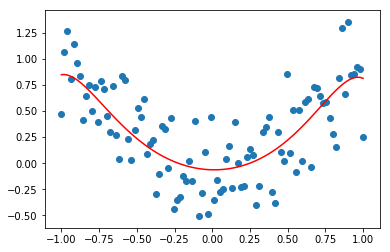

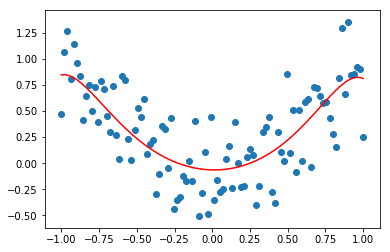

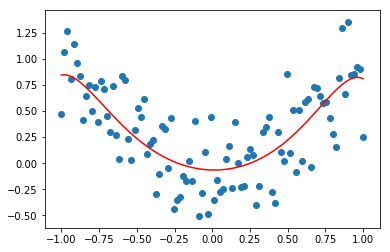

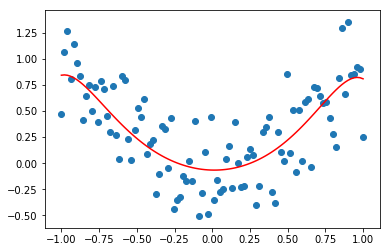

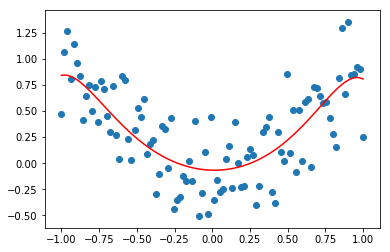

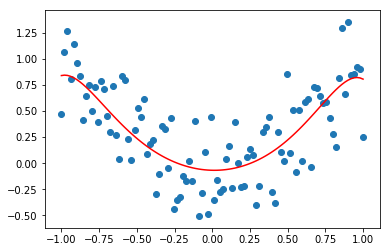

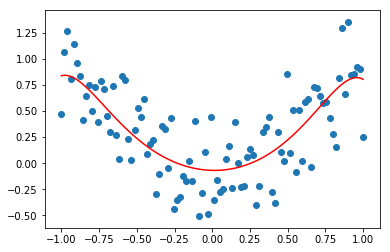

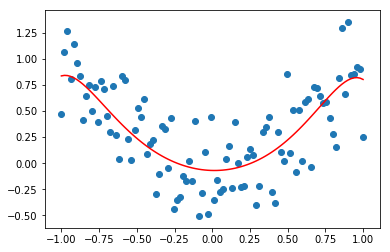

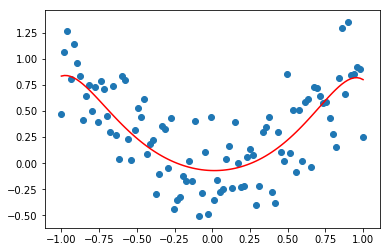

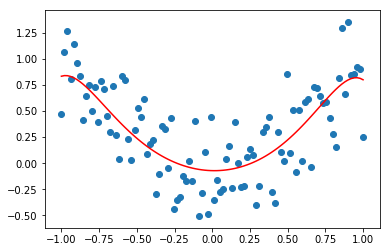

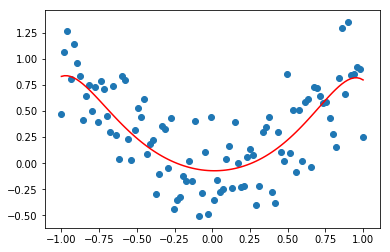

In [12]:
for reg_lambda in np.linspace(0,1,100):
    for epoch in range(training_epochs):
          sess.run(train_op, feed_dict={X: x_train, Y: y_train})
    final_cost = sess.run(cost, feed_dict={X: x_test, Y:y_test})
#     print('reg lambda', reg_lambda)
#     print('final cost', final_cost)

    # plot
    plt.clf()
    plt.scatter(x_data, y_data)
    trY2 = 0
    w_val = sess.run(w)
    for i in range(num_coeffs):
        trY2 += w_val[i] * np.power(x_data, i)
    plt.plot(x_data, trY2, 'r')
    plt.draw()
    plt.pause(0.0001)

In [13]:
sess.close()
print("Close Session")